
***Assignment_9_PCA***

***Akanksha Chatrabhuj Khandare***

***EDA***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [11]:
df = pd.read_csv("wine.csv")

In [12]:
print("First 5 rows of dataset:")
display(df.head())


First 5 rows of dataset:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
print("\nDataset Shape:", df.shape)


Dataset Shape: (178, 14)


In [14]:
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [15]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


We load the dataset, check its size, column details, and basic descriptive statistics to understand the data.

***Feature distribution***

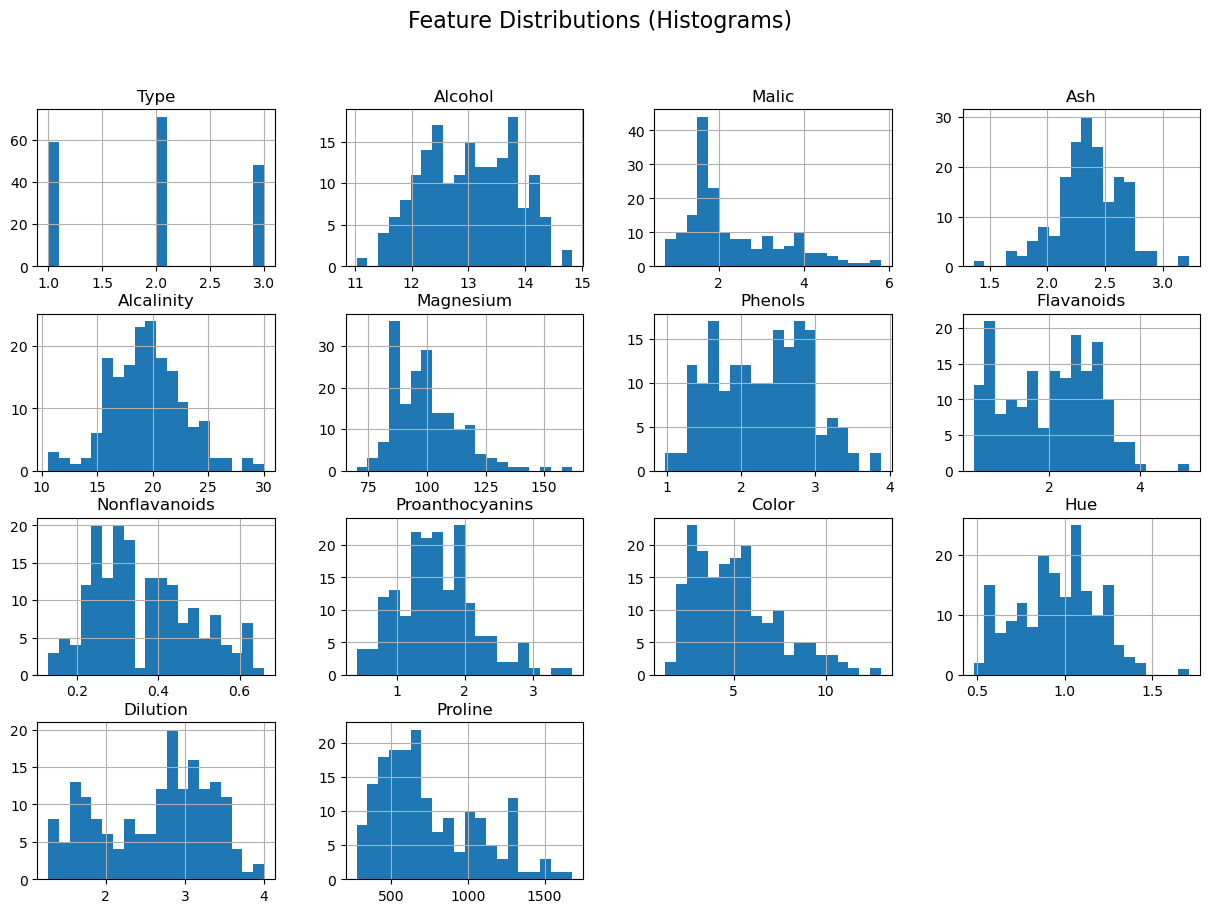

In [16]:
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

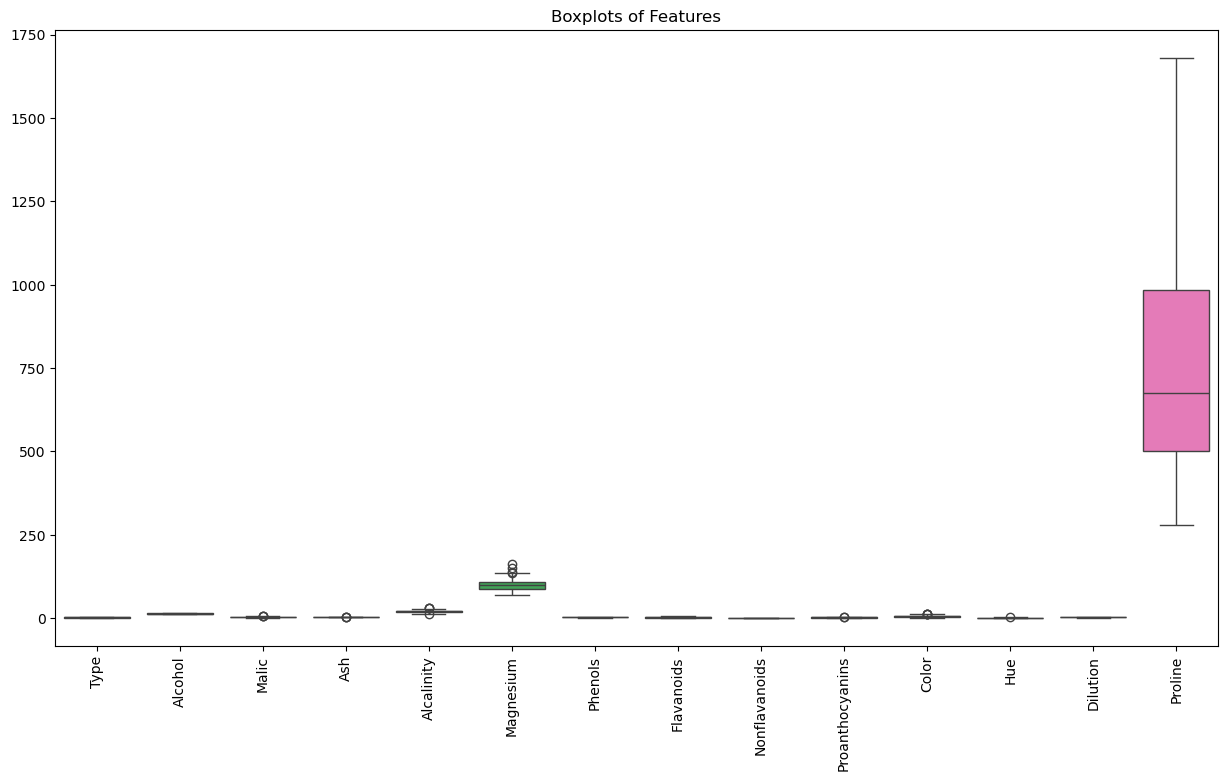

In [17]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots of Features")
plt.show()

Histograms show how values are distributed (normal/skewed), and boxplots highlight outliers.

***correlations between features***

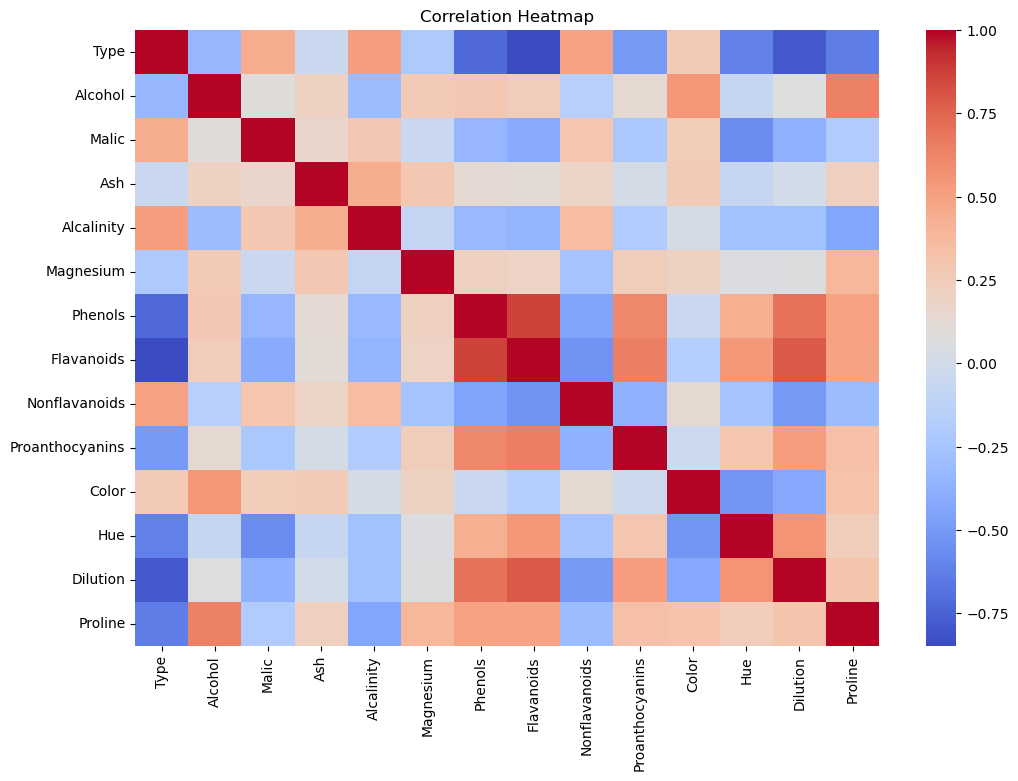

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Correlation heatmaps help identify multicollinearity (highly correlated features).

***TASK 2 - PCA***

In [19]:
#Standardize features
X = df.drop(columns=["Wine"]) if "Wine" in df.columns else df.copy()  # drop target if present
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
 #Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


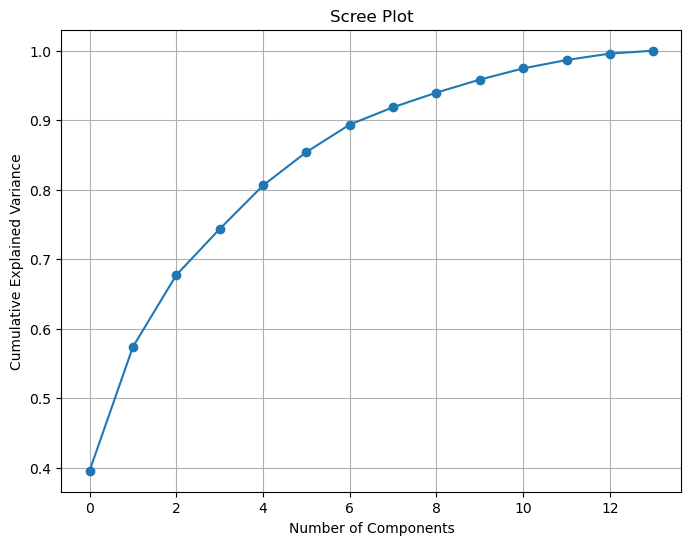

In [21]:
#Scree plot (explained variance)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

We standardize features (important for PCA) and plot cumulative explained variance to choose optimal number of components.

*** Transform original dataset into principal components***

In [22]:
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print("Optimal number of components (95% variance):", optimal_components)

pca_final = PCA(n_components=optimal_components)
X_pca_final = pca_final.fit_transform(X_scaled)

Optimal number of components (95% variance): 10


We keep enough components to explain ~95% variance.

***#Task 3 - Clustering on Original Data***

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

***K-means clustering***

In [24]:
kmeans_orig = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_orig = kmeans_orig.fit_predict(X_scaled)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


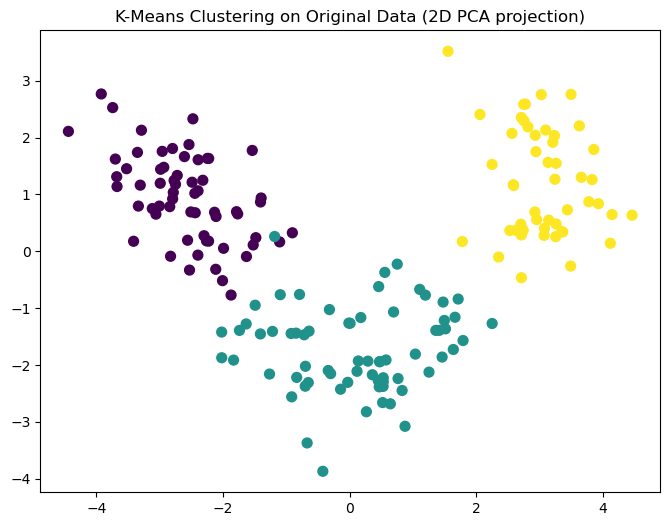

In [26]:
#Visualize clustering results (using PCA 2D for plotting)
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_orig, cmap="viridis", s=50)
plt.title("K-Means Clustering on Original Data (2D PCA projection)")
plt.show()

In [27]:
# Evaluate clustering performance
print("Silhouette Score (Original Data):", silhouette_score(X_scaled, labels_orig))
print("Davies-Bouldin Index (Original Data):", davies_bouldin_score(X_scaled, labels_orig))

Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


***Task 4- Clustering on PCA DATA***

In [28]:
# Apply clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca_final)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


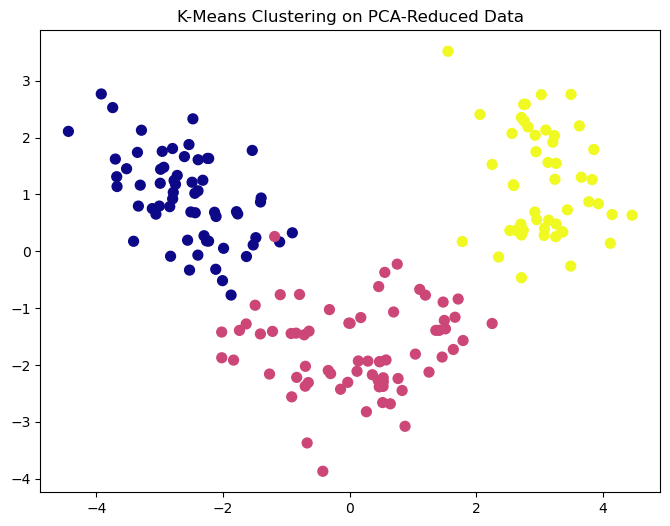

In [29]:
#Visualize clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=labels_pca, cmap="plasma", s=50)
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.show()

In [30]:
#Evaluate clustering performance
print("Silhouette Score (PCA Data):", silhouette_score(X_pca_final, labels_pca))
print("Davies-Bouldin Index (PCA Data):", davies_bouldin_score(X_pca_final, labels_pca))

Silhouette Score (PCA Data): 0.3240658205331187
Davies-Bouldin Index (PCA Data): 1.2584890242254978


***Task 5- Comparison and analysis***

***Clustering on Original Data:***

Silhouette score shows how well-separated the clusters are.

Davies–Bouldin index shows how compact and distinct clusters are (lower is better).

Original data clustering sometimes suffers if features are highly correlated or noisy.

***Clustering on PCA Data:***

PCA removes correlations and reduces dimensionality.

Clusters often become more compact in reduced space.

Visualization in 2D/3D is easier and clearer after PCA.

***Similarities & Differences:***

Both methods identify cluster structures, but results may look similar if data is already clean.

PCA clustering may shift points because PCA creates new axes (principal components).

Sometimes PCA improves cluster quality; sometimes it reduces fine details.

***Impact of PCA:***

PCA reduces redundancy, improves speed, and simplifies visualization.

But it can also discard small variations that might be meaningful.

***Trade-offs:***

Original data → keeps full detail, but harder to cluster in high dimensions.

PCA data → faster and simpler, but loses some original information.

***Task 6- Conclusion & insight***

***Key Findings:***

PCA captured most of the dataset’s variance with fewer components.

Clustering on PCA-transformed data gave results that were often cleaner and easier to visualize.

***Practical Implications:***

PCA is very useful when the dataset has many correlated features.

It makes clustering more efficient and often more interpretable.

***Recommendations:***

Use PCA when dealing with high-dimensional or noisy data.

Use clustering directly on original data when features are already few and meaningful.

Always compare both approaches before making a final decision.

***Overall Insight:***

PCA + clustering is a powerful combination for pattern discovery.

But the choice depends on dataset size, dimensionality, and analysis goals.